In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df_train = pd.read_csv('train.csv')

In [38]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
df_train['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

<Axes: >

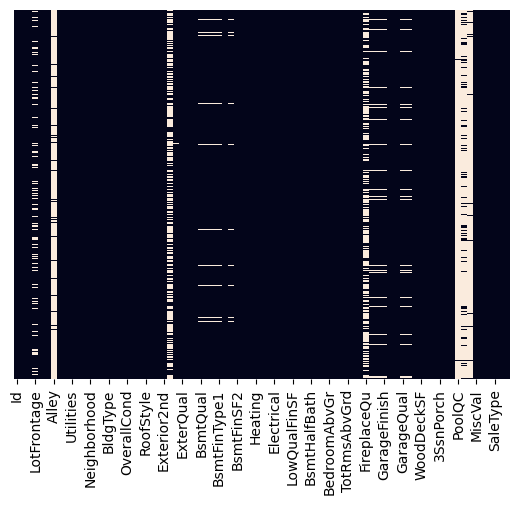

In [42]:
sns.heatmap(df_train.isnull(),yticklabels = False, cbar = False)

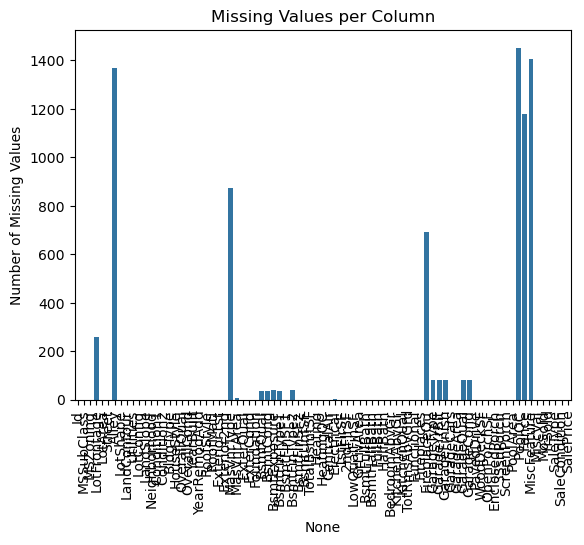

In [43]:
missing_counts = df_train.isnull().sum()

sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()

In [44]:
df_train.shape

(1460, 81)

In [45]:
## Filling missing values
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [46]:
df_train.drop(['Alley'],axis=1,inplace = True)

In [47]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])

In [48]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

In [49]:
df_train.drop(['GarageYrBlt'], axis=1,inplace = True)

In [50]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

In [51]:
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [52]:
df_train.shape

(1460, 76)

In [53]:
df_train.drop(['Id'],axis = 1, inplace = True)

In [54]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [55]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

<Axes: >

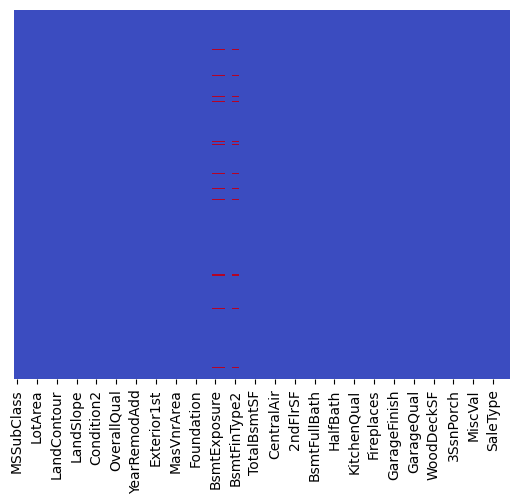

In [56]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [57]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])

<Axes: >

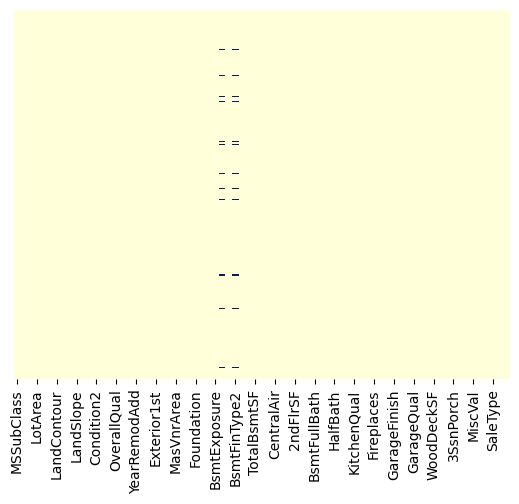

In [58]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [59]:
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

<Axes: >

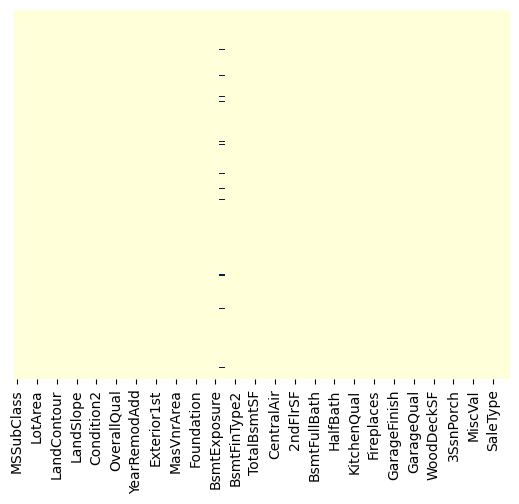

In [60]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [61]:
df_train.dropna(inplace=True)

In [62]:
df_train.shape

(1422, 75)

In [63]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   LotShape       1422 non-null   object 
 6   LandContour    1422 non-null   object 
 7   Utilities      1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemodAdd 

In [65]:
# Handle Categorical Feature

#column = df.select_dtypes(include=['object'])

columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [66]:
len(columns)

39

In [67]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [68]:
df_sample = pd.read_csv('sample_submission.csv')

In [69]:
df_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [70]:
df_sample.columns

Index(['Id', 'SalePrice'], dtype='object')

## Read Test_Data for test data reference

In [117]:
#df_test.to_csv('formulatedtest.csv',index=False)
df_test = pd.read_csv('cleaned_test.csv')

#### Select Features and Create Bathrooms Features for the both data train and test

In [118]:
# Create combined Bathrooms feature
df_train['Bathrooms'] = df_train['FullBath'] + 0.5 * df_train['HalfBath']
df_test['Bathrooms'] = df_test['FullBath'] + 0.5 * df_test['HalfBath']

# Select features
features = ['GrLivArea', 'BedroomAbvGr', 'Bathrooms']

X_train = df_train[features]
y_train = df_train['SalePrice']

X_test = df_test[features]

### Model Trainning

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Prediction

In [120]:
predictions = model.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on training data
train_preds = model.predict(X_train)

# Compare with actuals
print("R2 Score:", r2_score(y_train, train_preds))
print("RMSE:", mean_squared_error(y_train, train_preds, squared=False))

# Optional: Add to DataFrame and inspect
df_train['PredictedPrice'] = train_preds

R2 Score: 0.5818008101150977
RMSE: 51337.90384144043


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [122]:
sample_submission = pd.read_csv('sample_submission.csv')

### Final Submmission

In [123]:
sample_submission['SalePrice'] = predictions
sample_submission['PredictedSalePrice'] = predictions

In [124]:
sample_submission.to_csv('final_submission.csv', index=False)

In [125]:
final_df = pd.read_csv('final_submission.csv')

In [126]:
final_df.head()

,Id,SalePrice,PredictedSalePrice
0,1461,120255.466797,120255.466797
1,1462,151748.988483,151748.988483
2,1463,210810.943526,210810.943526
3,1464,208170.528188,208170.528188
4,1465,188189.217376,188189.217376


In [127]:
# Predict on training data
train_preds = model.predict(X_train)

# Optional: store in DataFrame for easy use
df_train['PredictedPrice'] = train_preds

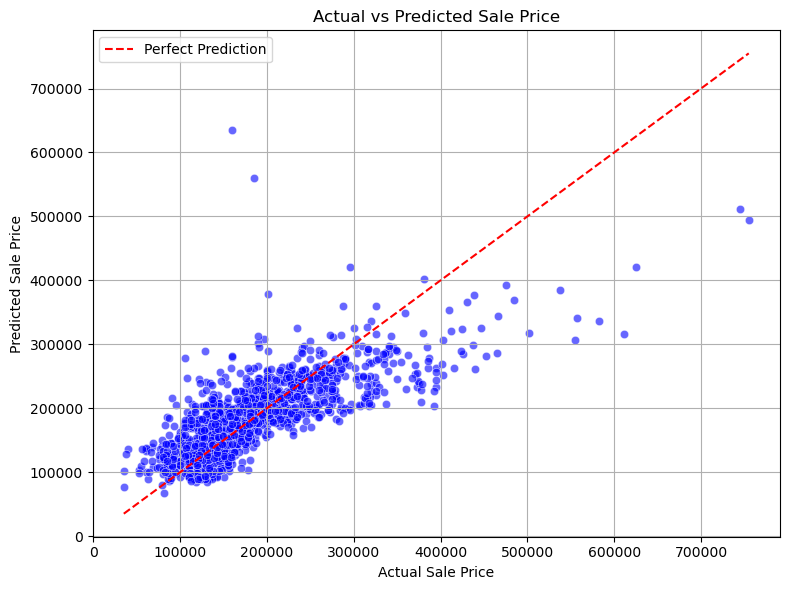

In [128]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_train['SalePrice'], y=df_train['PredictedPrice'], alpha=0.6, color='blue')

plt.plot([df_train['SalePrice'].min(), df_train['SalePrice'].max()],
         [df_train['SalePrice'].min(), df_train['SalePrice'].max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()